In [13]:
using Plots
using LinearAlgebra
using Random
using DelimitedFiles
using CSV, DataFrames

## ODD MAGIC

In [14]:
function oddMagic(order::Int)
    n = order
    if n % 2 == 0 || n < 3
        return error("Matrx's size must be odd and >3!")
    end
    mat = zeros(Int, n, n)
    matSize = n^2
    matEntry = 1
    row = 1
    col = div(n, 2) + 1
    while matEntry ≤ matSize
        mat[row, col] = matEntry
        nextRow = (row == 1 ? n : row - 1)
        nextCol = (col == n ? 1 : col + 1)
        if mat[nextRow, nextCol] != 0
            nextRow = (row == n ? 1 : row + 1)
            nextCol = col
        end
        row, col = nextRow, nextCol
        matEntry += 1
    end
    return mat
end

oddMagic (generic function with 1 method)

In [15]:
oddMagic(7)

7×7 Matrix{Int64}:
 30  39  48   1  10  19  28
 38  47   7   9  18  27  29
 46   6   8  17  26  35  37
  5  14  16  25  34  36  45
 13  15  24  33  42  44   4
 21  23  32  41  43   3  12
 22  31  40  49   2  11  20

## 24: isSubset

In [23]:
# 24.
function isSubset(array1::AbstractArray, array2::AbstractArray)
    set_1 = sort(unique(array1))
    set_2 = sort(unique(array2))
    for element in set_1
        if !(element in set_2)
            return false
        end
    end
    return true
end

x = rand(1:10, 20)
y = rand(1:10, 20)
println("x = $x, \nSet(x) = $(Set(x))")
println("x = $y, \nSet(y) = $(Set(y))")
println("isSubset(x, y) = $(isSubset(x, y))")

issubset(x, y) # available function


x = [4, 7, 8, 8, 6, 8, 2, 7, 4, 5, 2, 6, 10, 3, 7, 6, 1, 3, 10, 3], 
Set(x) = Set([5, 7, 8, 1, 4, 6, 2, 10, 3])
x = [1, 8, 2, 8, 5, 10, 8, 5, 6, 1, 8, 10, 5, 6, 10, 9, 4, 5, 1, 3], 
Set(y) = Set([5, 8, 1, 4, 6, 2, 10, 9, 3])
isSubset(x, y) = false


false

## 25. Frequency

In [17]:
n = 20
nums = 100000
v = rand(1:n, nums)
c = []
for num = 1:n
    fre_i = count(i -> (i == num), v)
    push!(c, fre_i)
end
println(c)


Any[4831, 5071, 5046, 4912, 4958, 4872, 5100, 5145, 5135, 5048, 5139, 5047, 4982, 4968, 4851, 4911, 4903, 5039, 5086, 4956]


## 26. Eratosthenes

In [18]:
function primes_less_thanN(N::Int)
    vect = Vector{Int}([i for i = 2:N])
    for k = 2:floor(Int, sqrt(N))
        deleteat!(vect, findall(x -> (x > k && mod(x, k) == 0), vect))
    end
    return vect
end

N = 10^6
primes = primes_less_thanN(N)
writedlm("all_primes_less_than_N.txt", primes)

## 27. Sombrero

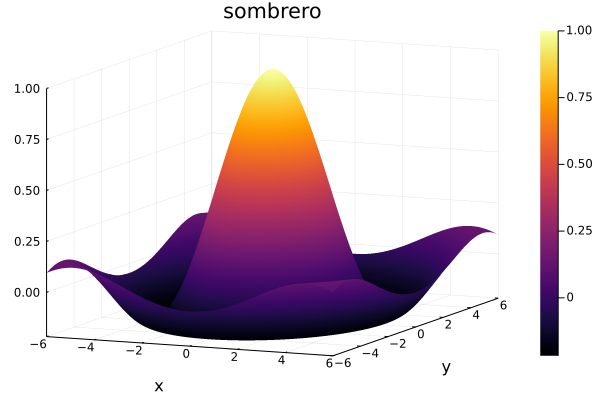

In [19]:
function sombrero(x::Real, y::Real)
    u = √(x^2 + y^2)
    return iszero(u) ? 1.0 : sin(u)/u
    # if iszero(u)
    #     return 1.0
    # else
    #     return sin(u) / u
    # end
end

x = -6:0.01:6
y = -6:0.01:6
z = [sombrero(x[i], y[j]) for i = 1:length(x), j = 1:length(y)]
plot(
    x, y, z,
    st = :surface,
    title = "sombrero",
    xlabel = "x",
    ylabel = "y"
)
# savefig("sombrero.png")

## 28. Det

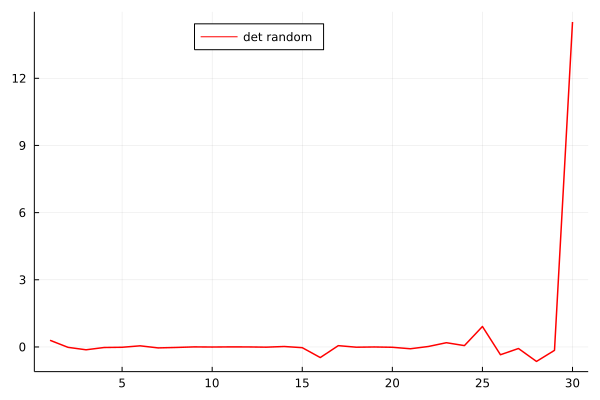

In [20]:
n = 30
x = 1:n
det_ = []
for size = 1:n
    push!(det_, det(rand(size, size)))
end
plot(x, det_, labels = "det random",
    line = (:red, 1.5),
    legend = (:top))

# savefig("det_random_01.png")


## 20. Spiral Mat

In [21]:
function spiralMat(nRow::Int, nCol::Int)
    if nRow ≤ 0 || nCol ≤ 0
        return error("The number of cols and rows must be positive!")
    end
    mat = zeros(Int, nRow, nCol)
    matSize = nRow * nCol
    matEntry = 1
    nextI = 1
    nextJ = 1
    Δs = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    direction = 1
    δ = Δs[direction]
    for matEntry = 1:matSize
        mat[nextI, nextJ] = matEntry
        nextI += δ[1]
        nextJ += δ[2]
        # if (nextI == nRow + 1) || (nextJ == nCol + 1) || (mat[nextI, nextJ] > 0)
        if nextI == nRow || nextJ == nCol || mat[nextI, nextJ] > 0
            direction = (direction + 1) % 4
            δ = Δs[direction]
        end
    end                                     
    return mat
end


spiralMat (generic function with 1 method)

In [22]:
spiralMat(5, 6)

LoadError: BoundsError: attempt to access 5×6 Matrix{Int64} at index [2, 0]

In [ ]:
function spiral(nRow::Int, nCol::Int)
    mat = zeros(Int, nRow, nCol)
    matSize = nRow * nCol
    Δs = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    # Δs = [(1, 0), (0, 1), (-1, 0), (0, -1)]
    direction = 1
    di, dj = Δs[direction]
    i, j = 1, 1
    for matEntry = 1:matSize
        mat[i, j] = matEntry
        nextI = mod1(i + di, nRow)
        nextJ = mod1(j + dj, nCol)
        # if mat[mod1(i + di, nRow), mod1(j + dj, nCol)] != 0
        if mat[nextI, nextJ] != 0
            direction = (1 + direction) % 4
            di, dj = Δs[direction]
        end
        i += di
        j += dj
    end
    return mat
end

spiral (generic function with 1 method)

In [ ]:
spiral(5, 9)

LoadError: BoundsError: attempt to access 4-element Vector{Tuple{Int64, Int64}} at index [0]